In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping


In [2]:
#load the data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV' ]
house_df =  pd.read_csv(url, sep= '\s+', names=col_names )
house_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:

#shape of dataframe
house_df.shape


(506, 14)

In [4]:
house_df.isnull().values.any()

False

In [5]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
house_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
house_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


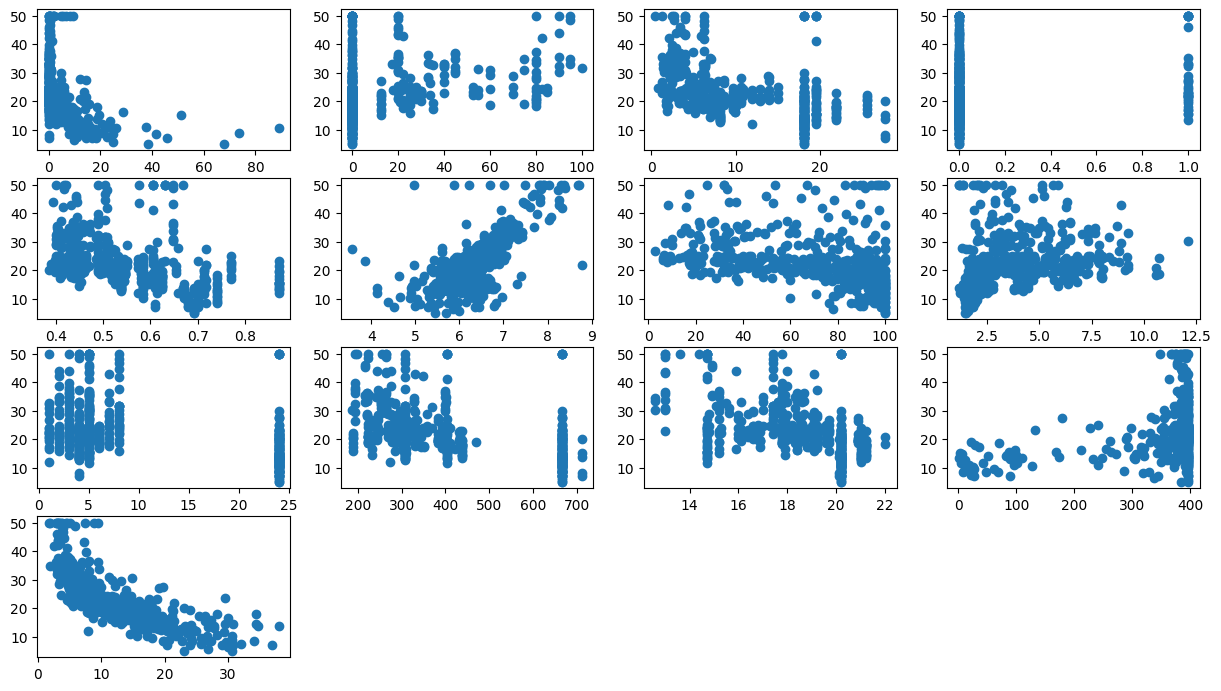

In [8]:
# visiualize all variables  with price(MEDV)
from scipy import stats
#creates figure
plt.figure(figsize=(15, 15))

for i, col in enumerate(house_df.columns[0:13]): #iterates over all columns except for price column (last one)
    plt.subplot(7, 4, i+1) # each row three figure
    x = house_df[col] #x-axis
    y = house_df['MEDV'] #y-axis
    plt.plot(x, y, 'o')


In [9]:
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1)) (np.unique(x)), color='red')
    plt.xlabel(col) # x-label
    plt.ylabel('prices') # y-label



IndentationError: ignored

In [10]:
feature = house_df.iloc[:,0:13] #  training variables
target = house_df.iloc[:,13] # target varible
print(feature.head())
print('\n',target.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  

 0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


In [11]:
#feature normalization
normalized_feature =  keras.utils.normalize(feature.values)
print(normalized_feature)


[[1.26388341e-05 3.59966795e-02 4.61957387e-03 ... 3.05971776e-02
  7.93726783e-01 9.95908132e-03]
 [5.78529889e-05 0.00000000e+00 1.49769546e-02 ... 3.77071843e-02
  8.40785474e-01 1.93620036e-02]
 [5.85729947e-05 0.00000000e+00 1.51744622e-02 ... 3.82044450e-02
  8.43137761e-01 8.64965806e-03]
 ...
 [1.23765824e-04 0.00000000e+00 2.43009593e-02 ... 4.27762066e-02
  8.08470305e-01 1.14884669e-02]
 [2.24644719e-04 0.00000000e+00 2.44548909e-02 ... 4.30471676e-02
  8.06519433e-01 1.32831260e-02]
 [9.69214289e-05 0.00000000e+00 2.43887924e-02 ... 4.29308164e-02
  8.11392431e-01 1.61092778e-02]]


In [12]:
# shuffle and split data into train (~80%) and test (~20%)
X_train, X_test, y_train, y_test = train_test_split(normalized_feature, target.values,
                                                    test_size=0.2, random_state=42)
print('training data shape: ',X_train.shape)
print('testing data shape: ',X_test.shape)


training data shape:  (404, 13)
testing data shape:  (102, 13)


In [14]:
n_cols = X_train.shape[1]

In [15]:
model = keras.Sequential()

model.add(keras.layers.Dense(150, activation=tf.nn.relu,
                       input_shape=(n_cols,)))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(1))


In [16]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150)               2100      
                                                                 
 dense_1 (Dense)             (None, 150)               22650     
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 dense_3 (Dense)             (None, 150)               22650     
                                                                 
 dense_4 (Dense)             (None, 150)               22650     
                                                                 
 dense_5 (Dense)             (None, 1)                 151       
                                                                 
Total params: 92,851
Trainable params: 92,851
Non-traina

In [18]:
early_stop = EarlyStopping(monitor='val_loss', patience=15)

In [19]:
history = model.fit(X_train, y_train, epochs=300,
          validation_split=0.2, verbose=1, callbacks=[early_stop])


Epoch 1/300
11/11 [==============================] - 1s 20ms/step - loss: 599.8607 - mae: 22.5558 - val_loss: 489.2005 - val_mae: 20.4847
Epoch 2/300
11/11 [==============================] - 0s 6ms/step - loss: 420.8832 - mae: 17.9571 - val_loss: 115.8659 - val_mae: 7.8615
Epoch 3/300
11/11 [==============================] - 0s 6ms/step - loss: 130.7070 - mae: 9.3626 - val_loss: 67.3322 - val_mae: 6.2683
Epoch 4/300
11/11 [==============================] - 0s 6ms/step - loss: 92.2557 - mae: 6.8087 - val_loss: 64.5917 - val_mae: 5.1584
Epoch 5/300
11/11 [==============================] - 0s 6ms/step - loss: 82.9963 - mae: 6.7589 - val_loss: 60.1164 - val_mae: 5.8622
Epoch 6/300
11/11 [==============================] - 0s 5ms/step - loss: 72.4982 - mae: 6.1432 - val_loss: 56.9049 - val_mae: 5.3225
Epoch 7/300
11/11 [==============================] - 0s 6ms/step - loss: 68.4403 - mae: 6.2059 - val_loss: 56.9383 - val_mae: 5.2717
Epoch 8/300
11/11 [==============================] - 0s 5ms/

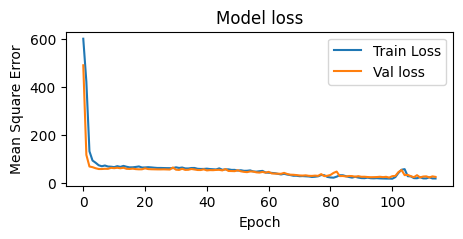

In [20]:
plt.figure(figsize=(5,2))
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(history.epoch, history.history['loss'],
           label='Train Loss')
plt.plot(history.epoch, history.history['val_loss'],
           label = 'Val loss')
plt.title('Model loss')
plt.legend()


In [21]:
score = model.evaluate(X_test, y_test, verbose=1)
print('loss value: ', score[0])
print('Mean absolute error: ', score[1])


4/4 [==============================] - 0s 2ms/step - loss: 18.7981 - mae: 2.7450
loss value:  18.79806137084961
Mean absolute error:  2.7449870109558105


In [22]:
# predict house price using the top 5 test data
test_predictions = model.predict(X_test).flatten()
print(test_predictions[:5])


4/4 [==============================] - 0s 3ms/step
[24.3593   33.41555  16.287224 23.220749 16.117289]


In [23]:
true_predicted = pd.DataFrame(list(zip(y_test, test_predictions)),
                    columns=['True Value','Predicted Value'])
true_predicted.head(5)



,True Value,Predicted Value
0,23.6,24.359301
1,32.4,33.415550
2,13.6,16.287224
3,22.8,23.220749
4,16.1,16.117289


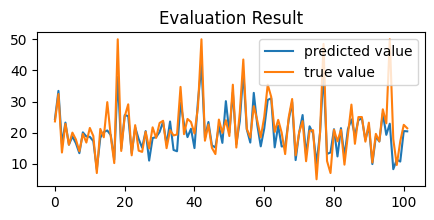

In [24]:
#visiulize the true value with predicted value (using line graph)
x = test_predictions
y = y_test
plt.figure(figsize=(5,2))
plt.plot(x, label='predicted value')
plt.plot(y, label='true value')
plt.title('Evaluation Result')
plt.legend()
plt.show()


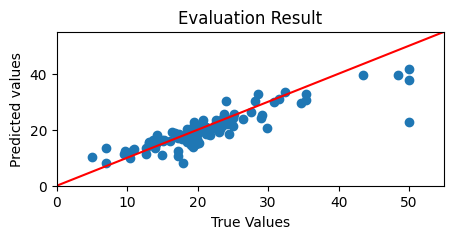

In [25]:
# visualize the prediction uisng diagonal line
y = test_predictions #y-axis
x = y_test #x-axis
fig, ax = plt.subplots(figsize=(5,2)) # create figure
ax.scatter(x,y) #scatter plots for x,y
ax.set(xlim=(0,55), ylim=(0, 55)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()
